## En route vers les probas et les tests d'hypothèse

![](https://imgs.xkcd.com/comics/here_to_help.png)

In [2]:
"hello, new line of code"

'hello, new line of code'

## Probas vs stats



"Les statistiques étudient des événements déroulés dans le passé à partir d'un grand nombre de données. Leur rôle est de permettre l'analyse, l'interprétation et la présentation simplifiée de ces informations.

Les probabilités s'intéressent quant à elles à l'avenir. Elles ont pour but de déterminer la probabilité, c'est-à-dire la chance ou le risque, qu'un événement aléatoire se produise."


## Un monde probabiliste...

Des trucs qui n'arrivent qu'en exercice :

- Pile ou face
- Lancer de dé

Mais aussi des trucs de la vraie vie :

- Dans combien de temps j'ai un bus...
- Répartition des tailles dans une population...
- Les erreurs de mesures dans un process industriel...
- Le bruit thermique d'un capteur...

(et on ne parle même pas du monde quantique où tout est aléatoire...)

## Vocabulaire

Une variable aléatoire est une variable dont la valeur est déterminée après la réalisation d’un phénomène, expérience ou événement, aléatoire. 
On la nomme souvent $X$.

On note $P(X=a)$ la probabilité que la variable $X$ soit égale à la valeur $a$.

## Exemple du Pile ou Face

- La variable aléatoire ?
- Les valeurs possibles ?
- Les probas ?


### Indépendance des lancers ou effet mémoire
On lance 20 fois une pièce non truquée. On fait 20 piles et 0 faces. Quelle est la probabilité de refaire un pile ?

On note "la proba de l'évènement A sachant que l'évènement B s'est produit" ou proba de A conditionnellement à B : $$P(A|B)$$

En cas d'indépendance de A et B on a $P(A|B)=P(A)$ et $P(B|A)=P(B)$

## Monty Hall ou le début du mal de crâne

Le fameux problème de Monty Hall (jeu télévisé)

- Soient trois portes, l'une cache une voiture, les deux autres une chèvre. Les prix sont répartis par tirage au sort.
- Le présentateur connaît la répartition des prix.
- Le joueur choisit une des portes, mais rien n'est révélé.
- Le présentateur ouvre une autre porte ne révélant pas la voiture.
- Le présentateur propose au candidat de changer son choix de porte à ouvrir définitivement.

La question qui se pose alors est :

   Le joueur augmente-t-il ses chances de gagner la voiture en changeant son choix initial ?


## Monty Hall (2/2)

A votre avis ? 

Vous pouvez 

... En débattre en groupe

... Faire l'expérience sur https://montyhall.io/

... Et si les intuitions n'arrivent pas à concorder... faire des simus pour se convaincre !

## Les fonctions de distribution : la PDF
La Probability Density Function donne la probabilité d'observer telle réalisation.

$$P(X=a) = pdf(a)$$

Exemple discret (on parle alors de Probability Mass Function, PMF) :

- Un Pile/Face
- Un lancer de Dé 6

Exemple continu : 
- Répartition des tailles dans une population

Propriété de la PDF : $\int_{-\infty}^{+\infty}pdf(x)dx=1$

## Les fonctions de distribution : la CDF
Intégrale de la PDF

Permet de répondre à la question  "Je lance 100 pièces et je veux savoir la proba de faire 80 "pile" ou moins"

$$P(X<a) = \int_{-\infty}^{a}pdf(x)dx = cdf(a)$$

## Loi empirique/ loi théorique

    All models are wrong, but some are useful.
George Box ~1970

Dans certains cas bien précis, on connait la loi théorique. Le reste du temps on l'approxime.

Pour obtenir la pdf empirique, on va utiliser l'histogramme. Pour estimer la cdf empirique on utilise la somme cumulée des observations triées par ordre croissant : $cdf(a) = \frac{1}{|X|}\sum_{i=1}^{|X|}\mathbb{1}_{X_i<a}$

Pour les amateurs de preuves : 
ces approximations empiriques sont justifiées par la loi des grands nombres (https://fr.wikipedia.org/wiki/Loi_des_grands_nombres)

In [3]:
import matplotlib.pyplot as plt
import random
import ipywidgets as ipw
plt.xkcd()
n=100
def showPDFEmpirical(n):
    x = random.choices(range(1,7),k=n)
    fig,(ax1,ax2) = plt.subplots(1,2)
    ax1.hist(x,bins=range(1,8),density=True)
    ax1.set_xticks(range(1,7))
    ax2.bar(range(1,7),[1/6]*6)
    ax2.set_xticks(range(1,7))
    plt.title("PDF empirique et théorique Dé 6 faces")
    plt.tight_layout()

    plt.show()


In [4]:
ipw.interact(showPDFEmpirical,n=ipw.IntSlider(min=100, max=2000, step=100, value=100))


interactive(children=(IntSlider(value=100, description='n', max=2000, min=100, step=100), Output()), _dom_clas…

<function __main__.showPDFEmpirical(n)>

## Des lois pour tout

Vous pouvez explorer la liste sur :

https://fr.wikipedia.org/wiki/Liste_de_lois_de_probabilit%C3%A9




## et une loi hors normes tellement elle est présente...

La gaussienne, la courbe en cloche, la loi normale...

La loi normale de moyenne $\mu$ et de variance $\sigma^2$ est notée $$\mathcal{N}(\mu,\sigma)$$

Sa pdf est :
$$pdf(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [3]:
import scipy.stats as sst
import numpy as np
def plotGauss():
    x=np.linspace(-5,5)
    x1=np.linspace(-5,-1)
    fig,(ax1,ax2) = plt.subplots(1,2,)
    fig.set_size_inches(15,5)
    ax1.plot(x,sst.norm.pdf(x))
    ax1.fill_between(x1,sst.norm.pdf(x1),color='g')
    ax1.annotate(
            'pdf(-1)',
            xy=(-1, 0.25), arrowprops=dict(arrowstyle='->'), xytext=(-3, 0.3))
    ax1.annotate(
            'cdf(-1)',
            xy=(-1.3, 0.1), arrowprops=dict(arrowstyle='->'), xytext=(1, 0.1))
    ax1.vlines(-1,0,0.4,ls='--')
    ax2.plot(x,sst.norm.cdf(x),color='g')
    ax2.annotate(
            'cdf(-1)',
            xy=(-1, 0.15), arrowprops=dict(arrowstyle='->'), xytext=(1, 0.1))
    ax2.vlines(-1,0,1,ls='--')
    plt.show()

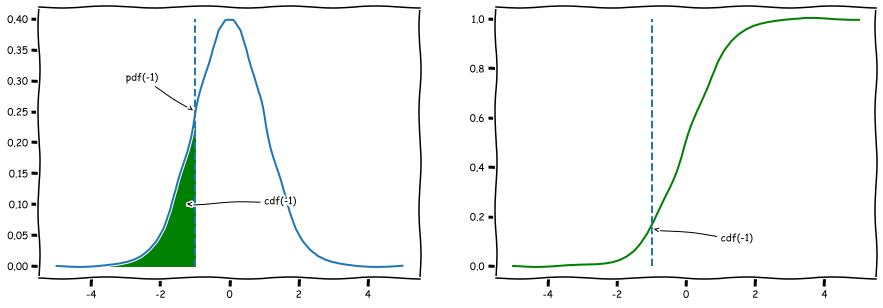

In [4]:
plotGauss()

## Pourquoi elle est partout ?

Grâce au théorème central limite !

Illustration avec des tirages Pile ou Face que l'on somme (pile=0,face=1)

In [5]:
def runSimuPF(n):
    x=np.random.choice([0,1],size=(100,n))
    plt.hist([x[i].sum() for i in range(0,100)],density=True)
    plt.show()

In [6]:
ipw.interact(runSimuPF,n=ipw.IntSlider(min=10, max=1000, step=10, value=10))


interactive(children=(IntSlider(value=10, description='n', max=1000, min=10, step=10), Output()), _dom_classes…

<function __main__.runSimuPF(n)>

## A vous de jouer
![](https://imgs.xkcd.com/comics/compiling.png)

## Test d'hypothèse
![](https://imgs.xkcd.com/comics/hypothesis_generation.png)
1. Définir l’hypothèse nulle H0
2. Choisir une mesure/statistique pour contrôler H0
3. Définir la distribution de probabilité sous H0
4. Choisir le niveau de signification $\alpha$
5. Calculer la valeur de la mesure/statistique et de la p-value à partir des observations
6. Prendre une décision concernant l’hypothèse posée

## H0/H1, Hypothèse nulle/hypothèse alternative
![](https://imgs.xkcd.com/comics/null_hypothesis.png)

Généralement on choisit comme hypothèse nulle ce que l'on sait modéliser, et on va évaluer si l'observation est plausible dans le cas où H0 serait vrai.

Exemple : pièce de pile/face truquée ou non. Que choisir pour H0 ?

## A vous de jouer
![](https://imgs.xkcd.com/comics/computer_problems.png)

## Le monde se divise en 2 catégories
Les bayésiens, les fréquentistes

![bayes_vs_freq](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)



In [7]:
from random import shuffle, choice
door_numbers = [1, 2, 3]
wanted_award = "car"
unwanted_award = "goat"
awards = [wanted_award, unwanted_award, unwanted_award]

def monty_hall_trial(initial_door_number, should_switch):
    shuffle(awards)
    doors = dict(zip(door_numbers, awards))
    remaining_door_numbers = [x for x in door_numbers if x != initial_door_number]
    for door_number in remaining_door_numbers:
        if doors[door_number] == unwanted_award:
            remaining_door_numbers.remove(door_number)
            break

    switched_door_number = remaining_door_numbers[0]
    final_door_number = switched_door_number if should_switch else initial_door_number
    won_car = doors[final_door_number] == wanted_award
    return won_car

In [8]:
def simulate_monty_hall(trial_number, should_switch):
    winning_counts = 0
    for trial_i in range(trial_number):
        initial_pick = choice(door_numbers)
        won_car = monty_hall_trial(initial_pick, should_switch)
        winning_counts += int(won_car)
    winning_prob = winning_counts/trial_number
    print(f"Trial Times: {trial_number} times\n"
          f"Switching: {should_switch}\n"
          f"Probability: {winning_prob:.2%}")